In [8]:
import os
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [10]:
ENABLE_CACHING = False

# Load the dataset
DATASET_PATH = "F:/2st 2 term/NLP/project/20_newsgroups"

folders = os.listdir(DATASET_PATH)
dg = []

if ENABLE_CACHING:
    # Perform caching operations
    for folder in folders:
        folder_path = os.path.join(DATASET_PATH, folder)
        # Caching logic goes here
else:
    # No caching operations
    for folder in folders:
        folder_path = os.path.join(DATASET_PATH, folder)
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                content = f.read()
            dg.append({"filename": file, "category": folder, "content": content})
        df = pd.DataFrame(dg)



In [11]:
stopwords_En = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [12]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords_En])
    return text

df['cleaned_content'] = df['content'].apply(lambda x: clean_text(x))

In [14]:
df.head(10)

,filename,category,content,cleaned_content
0,49960,alt.atheism,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,xref cantaloupesrvcscmuedu altatheism49960 alt...
1,51060,alt.atheism,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref cantaloupesrvcscmuedu altatheism51060 alt...
2,51119,alt.atheism,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroup altath path cantaloupesrvcscmueducra...
3,51120,alt.atheism,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref cantaloupesrvcscmuedu altatheism51120 alt...
4,51121,alt.atheism,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,xref cantaloupesrvcscmuedu altatheism51121 soc...
5,51122,alt.atheism,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroup altath path cantaloupesrvcscmueducra...
6,51123,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,path cantaloupesrvcscmueducrabapplesrvcscmuedu...
7,51124,alt.atheism,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,newsgroup altath path cantaloupesrvcscmueducra...
8,51125,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,path cantaloupesrvcscmueducrabapplesrvcscmuedu...
9,51126,alt.atheism,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,path cantaloupesrvcscmueducrabapplesrvcscmuedu...


In [17]:
#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer(max_df=0.9, min_df=0.1)
features_tfidf = tfidf.fit_transform(df['cleaned_content'])
print(features_tfidf.shape)
print('Sparse Matrix:\n', features_tfidf)
features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf


(19997, 127)
Sparse Matrix:
   (0, 16)	0.06460173900324524
  (0, 45)	0.06244894148803156
  (0, 89)	0.05132143945469458
  (0, 48)	0.06921414645664516
  (0, 14)	0.03735348017966928
  (0, 26)	0.0663672925207025
  (0, 55)	0.055957497402581234
  (0, 18)	0.06780544059250397
  (0, 83)	0.06591185381046337
  (0, 106)	0.04954931200594338
  (0, 69)	0.1391788416684202
  (0, 73)	0.0668051168004524
  (0, 118)	0.11112888866063435
  (0, 120)	0.27282180835453274
  (0, 22)	0.06629519748077779
  (0, 10)	0.15702242645726483
  (0, 112)	0.11996408498248556
  (0, 32)	0.05580924265232304
  (0, 91)	0.060777748281383256
  (0, 99)	0.06558748748609815
  (0, 27)	0.13046757534569514
  (0, 51)	0.04547270070491136
  (0, 121)	0.1652972306217797
  (0, 35)	0.06029169128786273
  (0, 81)	0.19172278948433386
  :	:
  (19995, 66)	0.43887544622322383
  (19995, 72)	0.13558412471277093
  (19995, 70)	0.10650553060456215
  (19995, 3)	0.07774919398855522
  (19995, 21)	0.1208075705905776
  (19995, 125)	0.12078029556093074
  (19996,

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
0,0.069411,0.000000,0.000000,0.059591,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.111129,0.110421,0.272822,0.165297,0.117128,0.000000,0.268609,0.046286,0.000000
1,0.000000,0.000000,0.000000,0.015610,0.0,0.0,0.023282,0.000000,0.000000,0.036143,...,0.057024,0.135849,0.038567,0.047644,0.057733,0.051137,0.050309,0.000000,0.008083,0.020152
2,0.000000,0.000000,0.000000,0.038520,0.0,0.0,0.000000,0.000000,0.052955,0.000000,...,0.000000,0.071834,0.214129,0.000000,0.000000,0.000000,0.212816,0.043407,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.095248,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.176495,0.000000,0.000000,0.000000,0.000000,0.107335,0.147965,0.000000
4,0.000000,0.393635,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.258097,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.211564,0.291649,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,0.000000,0.000000,0.000000,0.104677,0.0,0.0,0.000000,0.228968,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.144582,0.117959,0.162611,0.000000
19993,0.000000,0.000000,0.000000,0.079205,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.147708,0.000000,0.000000,0.000000,0.000000,0.109400,0.178512,0.123042,0.000000
19994,0.000000,0.000000,0.000000,0.111610,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.208139,0.000000,0.000000,0.000000,0.219376,0.154159,0.125773,0.173382,0.000000
19995,0.000000,0.000000,0.000000,0.077749,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.144992,0.000000,0.177978,0.000000,0.000000,0.000000,0.000000,0.120780,0.000000


In [18]:
# Split the dataset into train and test sets
X = df["cleaned_content"]
y = df["category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)


In [19]:
# Extract features using TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words="english")
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [20]:
# Train and evaluate multiple classifiers
classifiers = [
    (MultinomialNB(), "Naive Bayes")
   ,(LogisticRegression(max_iter=1000), "Logistic Regression")
     , (LinearSVC(max_iter=100000,random_state=35), "model_SVM")
]

In [21]:
# Define a function to train and evaluate a classifier
def train_and_evaluate(clf, clf_name):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{clf_name} Accuracy: {acc}")
    return clf, acc, preds

In [25]:
# Train and evaluate each classifier,and store the accuracies and names for visualization
accuracies = []
clf_names = []
for clf, clf_name in classifiers:
    _, acc, _ = train_and_evaluate(clf, clf_name)
    accuracies.append(acc)
    clf_names.append(clf_name)
    if acc > best_acc:
        best_acc = acc
        best_clf = clf
        best_clf_name = clf_name
print(f"Best Model: {best_clf_name}")


Naive Bayes Accuracy: 0.8915
Logistic Regression Accuracy: 0.921
model_SVM Accuracy: 0.92675
Best Model: model_SVM


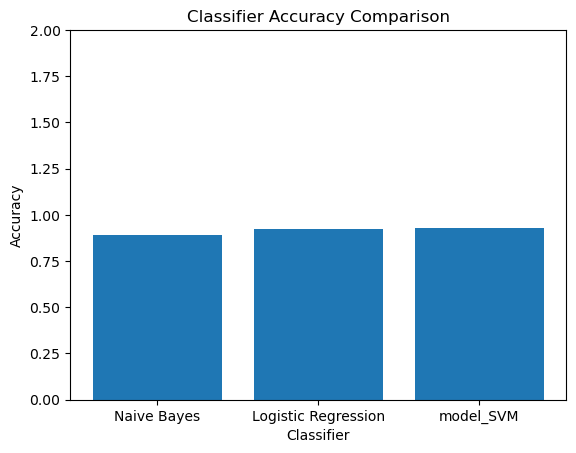

In [32]:
# Visualize the results
plt.bar(clf_names, accuracies)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.ylim([0.0, 2.0])
plt.title("Classifier Accuracy Comparison")
plt.show()

model_SVM Accuracy: 0.92675


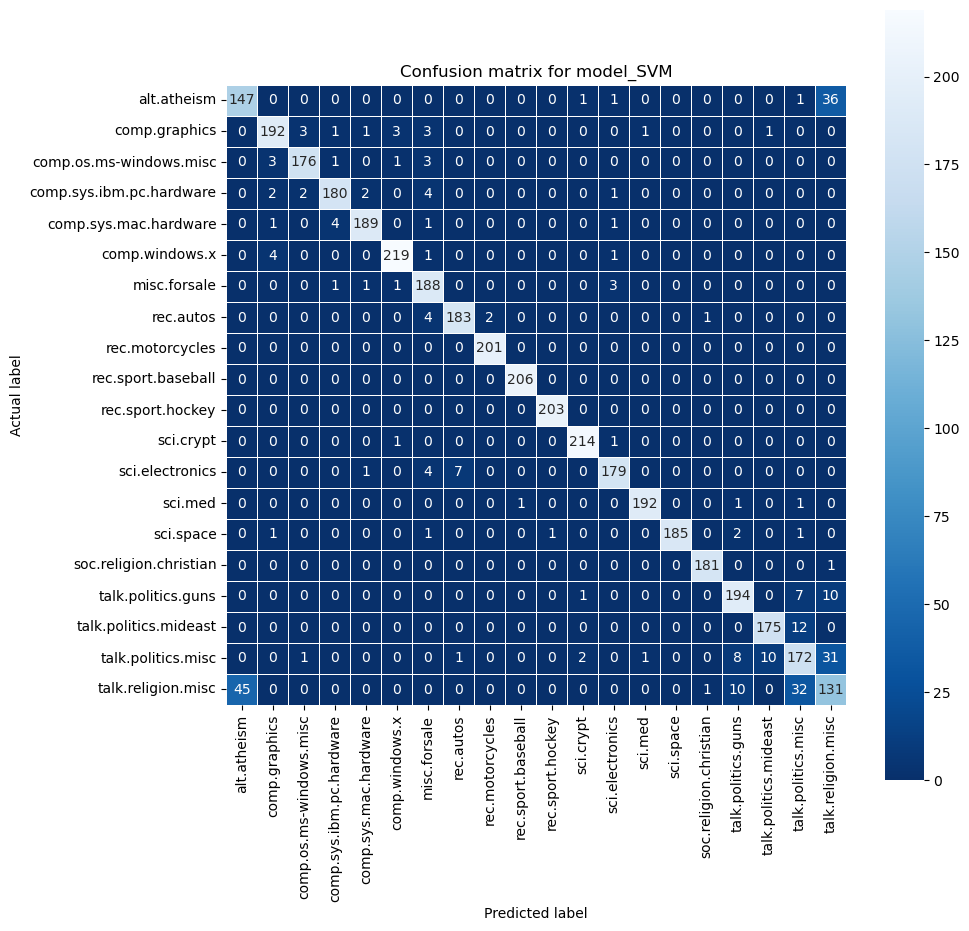

In [33]:
# Generate confusion matrix for the best model
_,_,preds = train_and_evaluate(best_clf, best_clf_name)
cm = confusion_matrix(y_test, preds)
#Training the model
# Plot heatmap of confusion matrix with annotated values
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r', xticklabels=best_clf.classes_, yticklabels=best_clf.classes_)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f'Confusion matrix for {best_clf_name}')
plt.show()